In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import loggamma #gamma as gamma_fct
from math import cos, pi
from numpy import log, sum, exp, prod
from numpy.random import beta, binomial, normal, dirichlet, uniform, gamma, seed, multinomial, gumbel, rand, poisson


In [12]:
x = np.arange(1851, 1962+1)

y = np.array([4,5,4,1,0,4,3,4,0,6,3,3,4,0,2,6,3,3,5,4,5,3,1,4,4,1,5,5,3,4,2,5,2,2,3,4,2,1,3,2,2,
      1,1,1,1,3,0,0,1,0,1,1,0,0,3,1,0,3,2,2,0,1,1,1,0,1,0,1,0,0,0,2,1,0,0,0,1,1,0,2,3,3,
      1,1,2,1,1,1,1,2,4,2,0,0,0,1,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1])

In [13]:
n = len(y) 

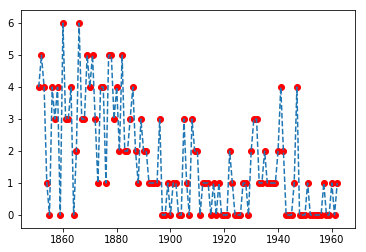

In [14]:
plt.plot(x,y, linestyle='--')
plt.scatter(x,y, color="red")
plt.show()

Prior hyperparameter:

In [15]:
alpha = 0.001
beta  = 0.001
delta = 0.001
gamma = 0.001

m =  3

In [16]:
s_m = np.sum(y[:m])
s_m

13

In [17]:
s_n = np.sum(y)
s_n

191

In [18]:
#log_post_m = np.log(gamma_fct(alpha + s_m)) + np.log(gamma_fct(gamma + s_n - s_m)) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)

In [19]:
log_post_m = loggamma(alpha + s_m) + loggamma(gamma + s_n - s_m) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)
log_post_m

-86.67273234364711

In [20]:
def post_bp(m, y, alpha = 1.2, beta = 1.1, gamma = 1.0, delta = 1.2):
    n = len(y)
    assert n > m, 'Break point must be strictly smaller than length of time series'
    s_m = np.sum(y[:m])
    s_n = np.sum(y)
    #log_post_m = np.log(gamma_fct(alpha + s_m)) + np.log(gamma_fct(gamma + s_n - s_m)) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)
    log_post_m = loggamma(alpha + s_m) + loggamma(gamma + s_n - s_m) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)
    return log_post_m  # np.exp(log_post_m)


In [21]:
post_bp(m = 3, y = y, alpha = 1.2, beta = 1.1, gamma = 1.0, delta = 1.2)

-90.80516809055177

In [22]:
#trim = 5

lprob = []
for t in range(n):
#for t in range(trim, n-2):
    lprob.append(post_bp(m = t, y = y, alpha = 2.2, beta = 1.1, gamma = 2.0, delta = 1.2))

lprob = lprob - np.max(lprob)
prob  = np.exp(lprob)
probm  = prob/np.sum(prob)

In [23]:
probm

array([1.21519785e-15, 1.54503026e-15, 6.87446390e-15, 1.94865787e-14,
       6.62580526e-15, 1.89105771e-15, 4.44317890e-15, 6.61983203e-15,
       1.81514069e-14, 5.29861421e-15, 4.54998430e-14, 7.39068662e-14,
       1.22080534e-13, 4.04590956e-13, 9.62935548e-14, 8.82593155e-14,
       1.07710965e-12, 1.93975824e-12, 3.55841662e-12, 3.02091416e-11,
       1.31663013e-10, 1.44873795e-09, 3.05807089e-09, 1.15767978e-09,
       6.00477516e-09, 3.35301189e-08, 1.27017356e-08, 1.90171185e-07,
       3.38946886e-06, 9.01578602e-06, 7.08876556e-05, 7.11784832e-05,
       1.89809717e-03, 1.99186805e-03, 2.14237207e-03, 7.29944873e-03,
       8.46355458e-02, 9.88440337e-02, 3.63080591e-02, 1.45905262e-01,
       1.84455751e-01, 2.39541096e-01, 9.51241632e-02, 3.89891625e-02,
       1.64676838e-02, 7.15649845e-03, 3.33396277e-02, 4.61758213e-03,
       6.87524268e-04, 3.30504140e-04, 5.45766007e-05, 2.76948164e-05,
       1.43386023e-05, 2.68708237e-06, 5.36322055e-07, 2.22585240e-06,
      

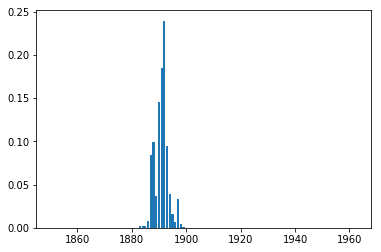

In [24]:
fig, ax = plt.subplots()
rects1 = ax.bar(x, probm, label='posterior of change point')
plt.show()

In [25]:
t_max = np.argmax(probm) #+ trim

x[t_max]

1892

In [26]:
# mean = sum n*p

In [27]:

def exact_post_cp(y, alpha = 2.2, beta = 1.1, gamma = 2.0, delta = 1.2):
    """
    Calculate exact posterior of single change point
    """
    n = len(y) ; s_n = np.sum(y) ; lprob = []
    for m in range(n):
    #for t in range(trim, n-2):
        s_m = np.sum(y[:m])
        #log_post_m = np.log(gamma_fct(alpha + s_m)) + np.log(gamma_fct(gamma + s_n - s_m)) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)
        log_post_m = loggamma(alpha + s_m) + loggamma(gamma + s_n - s_m) - (alpha + s_m) * np.log(beta + m) - (gamma + s_n - s_m) * np.log(delta + n - m)
        lprob.append(log_post_m)
    lprob = lprob - np.max(lprob)
    prob = np.exp(lprob)
    probm = prob/np.sum(prob)
    return probm


In [28]:
probm = exact_post_cp(y, alpha = 1.2, beta = 1.1, gamma = 1.0, delta = 1.2)
probm

array([1.85001872e-15, 1.04896366e-15, 3.57623912e-15, 9.75735635e-15,
       3.84184983e-15, 1.29948354e-15, 2.85147094e-15, 4.22551759e-15,
       1.11872194e-14, 3.59009651e-15, 2.83206567e-14, 4.62907052e-14,
       7.69973292e-14, 2.52688862e-13, 6.37630282e-14, 5.96845433e-14,
       7.02514077e-13, 1.27742108e-12, 2.36724234e-12, 1.99449286e-11,
       8.73930883e-11, 9.63037731e-10, 2.06602006e-09, 8.02848600e-10,
       4.21117439e-09, 2.38298815e-08, 9.23858215e-09, 1.40111218e-07,
       2.53992453e-06, 6.89775668e-06, 5.54467574e-05, 5.68860508e-05,
       1.55876886e-03, 1.67286110e-03, 1.83984421e-03, 6.43403348e-03,
       7.70260741e-02, 9.21245910e-02, 3.44615660e-02, 1.42699036e-01,
       1.84877236e-01, 2.46133336e-01, 9.94438934e-02, 4.14515303e-02,
       1.77976280e-02, 7.85953922e-03, 3.79069406e-02, 5.28184318e-03,
       7.90651189e-04, 3.85718251e-04, 6.39535993e-05, 3.29046256e-05,
       1.72684963e-05, 3.24322066e-06, 6.48336875e-07, 2.78815339e-06,
      

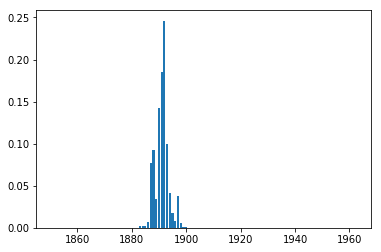

In [29]:
x = np.arange(0, len(probm))

fig, ax = plt.subplots()
rects1 = ax.bar(x, probm, label='posterior of change point')
plt.show()

## Simulate data:

In [168]:
def cycle(N, nof_cycles = 1):
  return np.cos(2*pi*np.arange(0,N)*nof_cycles/N)


def rAR1(N,phi, mu=0, sigma=1, burn=100):
    y = np.zeros((N+burn))
    for t in range(N+burn-1):
        y[t+1] = phi*y[t] + normal(loc=mu, scale = sigma, size=1)     
    return y[burn:]


def rpois_AR1(N,phi, theta = 1., mu=0, sigma=1, burn=100):
    y = np.zeros((N+burn))
    signal = np.zeros((N+burn))
    log_lambda = np.zeros((N+burn))
    for t in range(N+burn-1):
        y[t+1] = phi*y[t] + normal(loc=mu, scale = sigma, size=1)     
        log_lambda[t+1] = theta * y[t+1]
        signal[t+1] = poisson(size=1, lam=exp(log_lambda[t+1]))
    return signal[burn:]

np.random.seed(0)   # set seed

N = 2000
omega = 1

y1 = omega*cycle(N, nof_cycles = 2) + rAR1(N, phi = 0.7, sigma = 0.6)

y2 = omega*cycle(N, nof_cycles = 2) + rpois_AR1(N, phi = 0.7, sigma = 0.6)

y3 = omega*cycle(N , nof_cycles = 2) + rAR1(N , phi = 0.5, sigma = 1.4)

y4 = omega*cycle(N, nof_cycles = 2) 


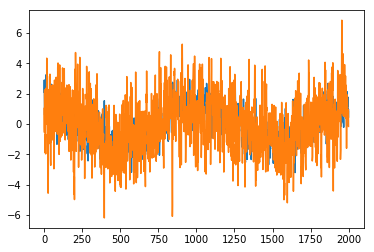

In [169]:
# Plot trajectories:
#---------------------
plt.figure() ;pd.Series(y1).plot() ;pd.Series(y3).plot() ;plt.show()

In [199]:
# Simulate AR1 with single mean/variance break:
y_break = np.concatenate((rpois_AR1(100, phi = 0.5, theta = .1, mu = 0.1, sigma = 2), rpois_AR1(70, phi = 0.5, theta = .1, mu = 10, sigma = 2)))
#y_break = np.concatenate((rAR1(700, phi = 0.5, mu = 0, sigma = 2), rAR1(700, phi = 0.5, mu = 10, sigma = 2)))

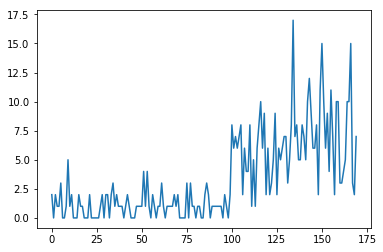

In [200]:
plt.figure() ;pd.Series(y_break).plot() ;plt.show()


In [201]:
probm = exact_post_cp(y_break)
probm

array([6.96476208e-82, 6.74294541e-82, 3.68941149e-81, 3.76777727e-81,
       1.01522099e-80, 2.85986950e-80, 1.35087578e-80, 9.19810433e-80,
       7.59439243e-79, 2.36489456e-78, 1.62782854e-79, 4.75574718e-79,
       6.05218604e-79, 4.38215463e-78, 3.59124505e-77, 3.28873113e-76,
       3.90514457e-76, 1.32093646e-75, 4.54129057e-75, 4.71767275e-74,
       5.32793890e-73, 6.50723319e-72, 7.34208614e-72, 9.38477441e-71,
       1.28645024e-69, 1.88512927e-68, 2.94481768e-67, 4.89199388e-66,
       2.04760668e-65, 2.14285477e-65, 3.75527525e-64, 4.02797688e-64,
       4.50732107e-64, 8.05773049e-63, 9.22279948e-63, 2.88895370e-63,
       1.34469957e-62, 1.70332089e-62, 8.14066277e-62, 3.95765300e-61,
       1.95768908e-60, 3.78532467e-59, 1.95353034e-58, 2.63646059e-58,
       1.40168346e-57, 2.99822007e-56, 6.77897414e-55, 1.61944299e-53,
       9.48533114e-53, 5.66919685e-52, 3.45882849e-51, 2.15494207e-50,
       1.80792975e-51, 1.15201686e-50, 1.12910430e-51, 7.34600036e-51,
      